# Universidad del Valle de Guatemala
# Deep Learning y Sistemas Inteligentes
<hr></hr>

## Proyecto Final
## Estudio y desarrollo de red neuronal para la clasificación de productos de tecnología, alimentos y mobiliario


### Autores:
Andres de la Roca - 20332  
Jun Woo Lee - 20358

In [1]:
# Cargando las librerias necesarias para el proyecto
import numpy as np
from numpy.random import seed
seed(1)
import tensorflow as tf
tf.random.set_seed(1)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
%matplotlib inline
import os
import shutil
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

### Exploracion de la data

In [2]:
# Cargando los datos
modelpath = "./models/"
dataset = "./dataset/images/"
train_path = dataset + "train/"
test_path = dataset + "test/"

# Cambiar segun cantidad de datos
train_length = 160
# train_length = train_length + 1
test_length = 40
# test_length = test_length + 1

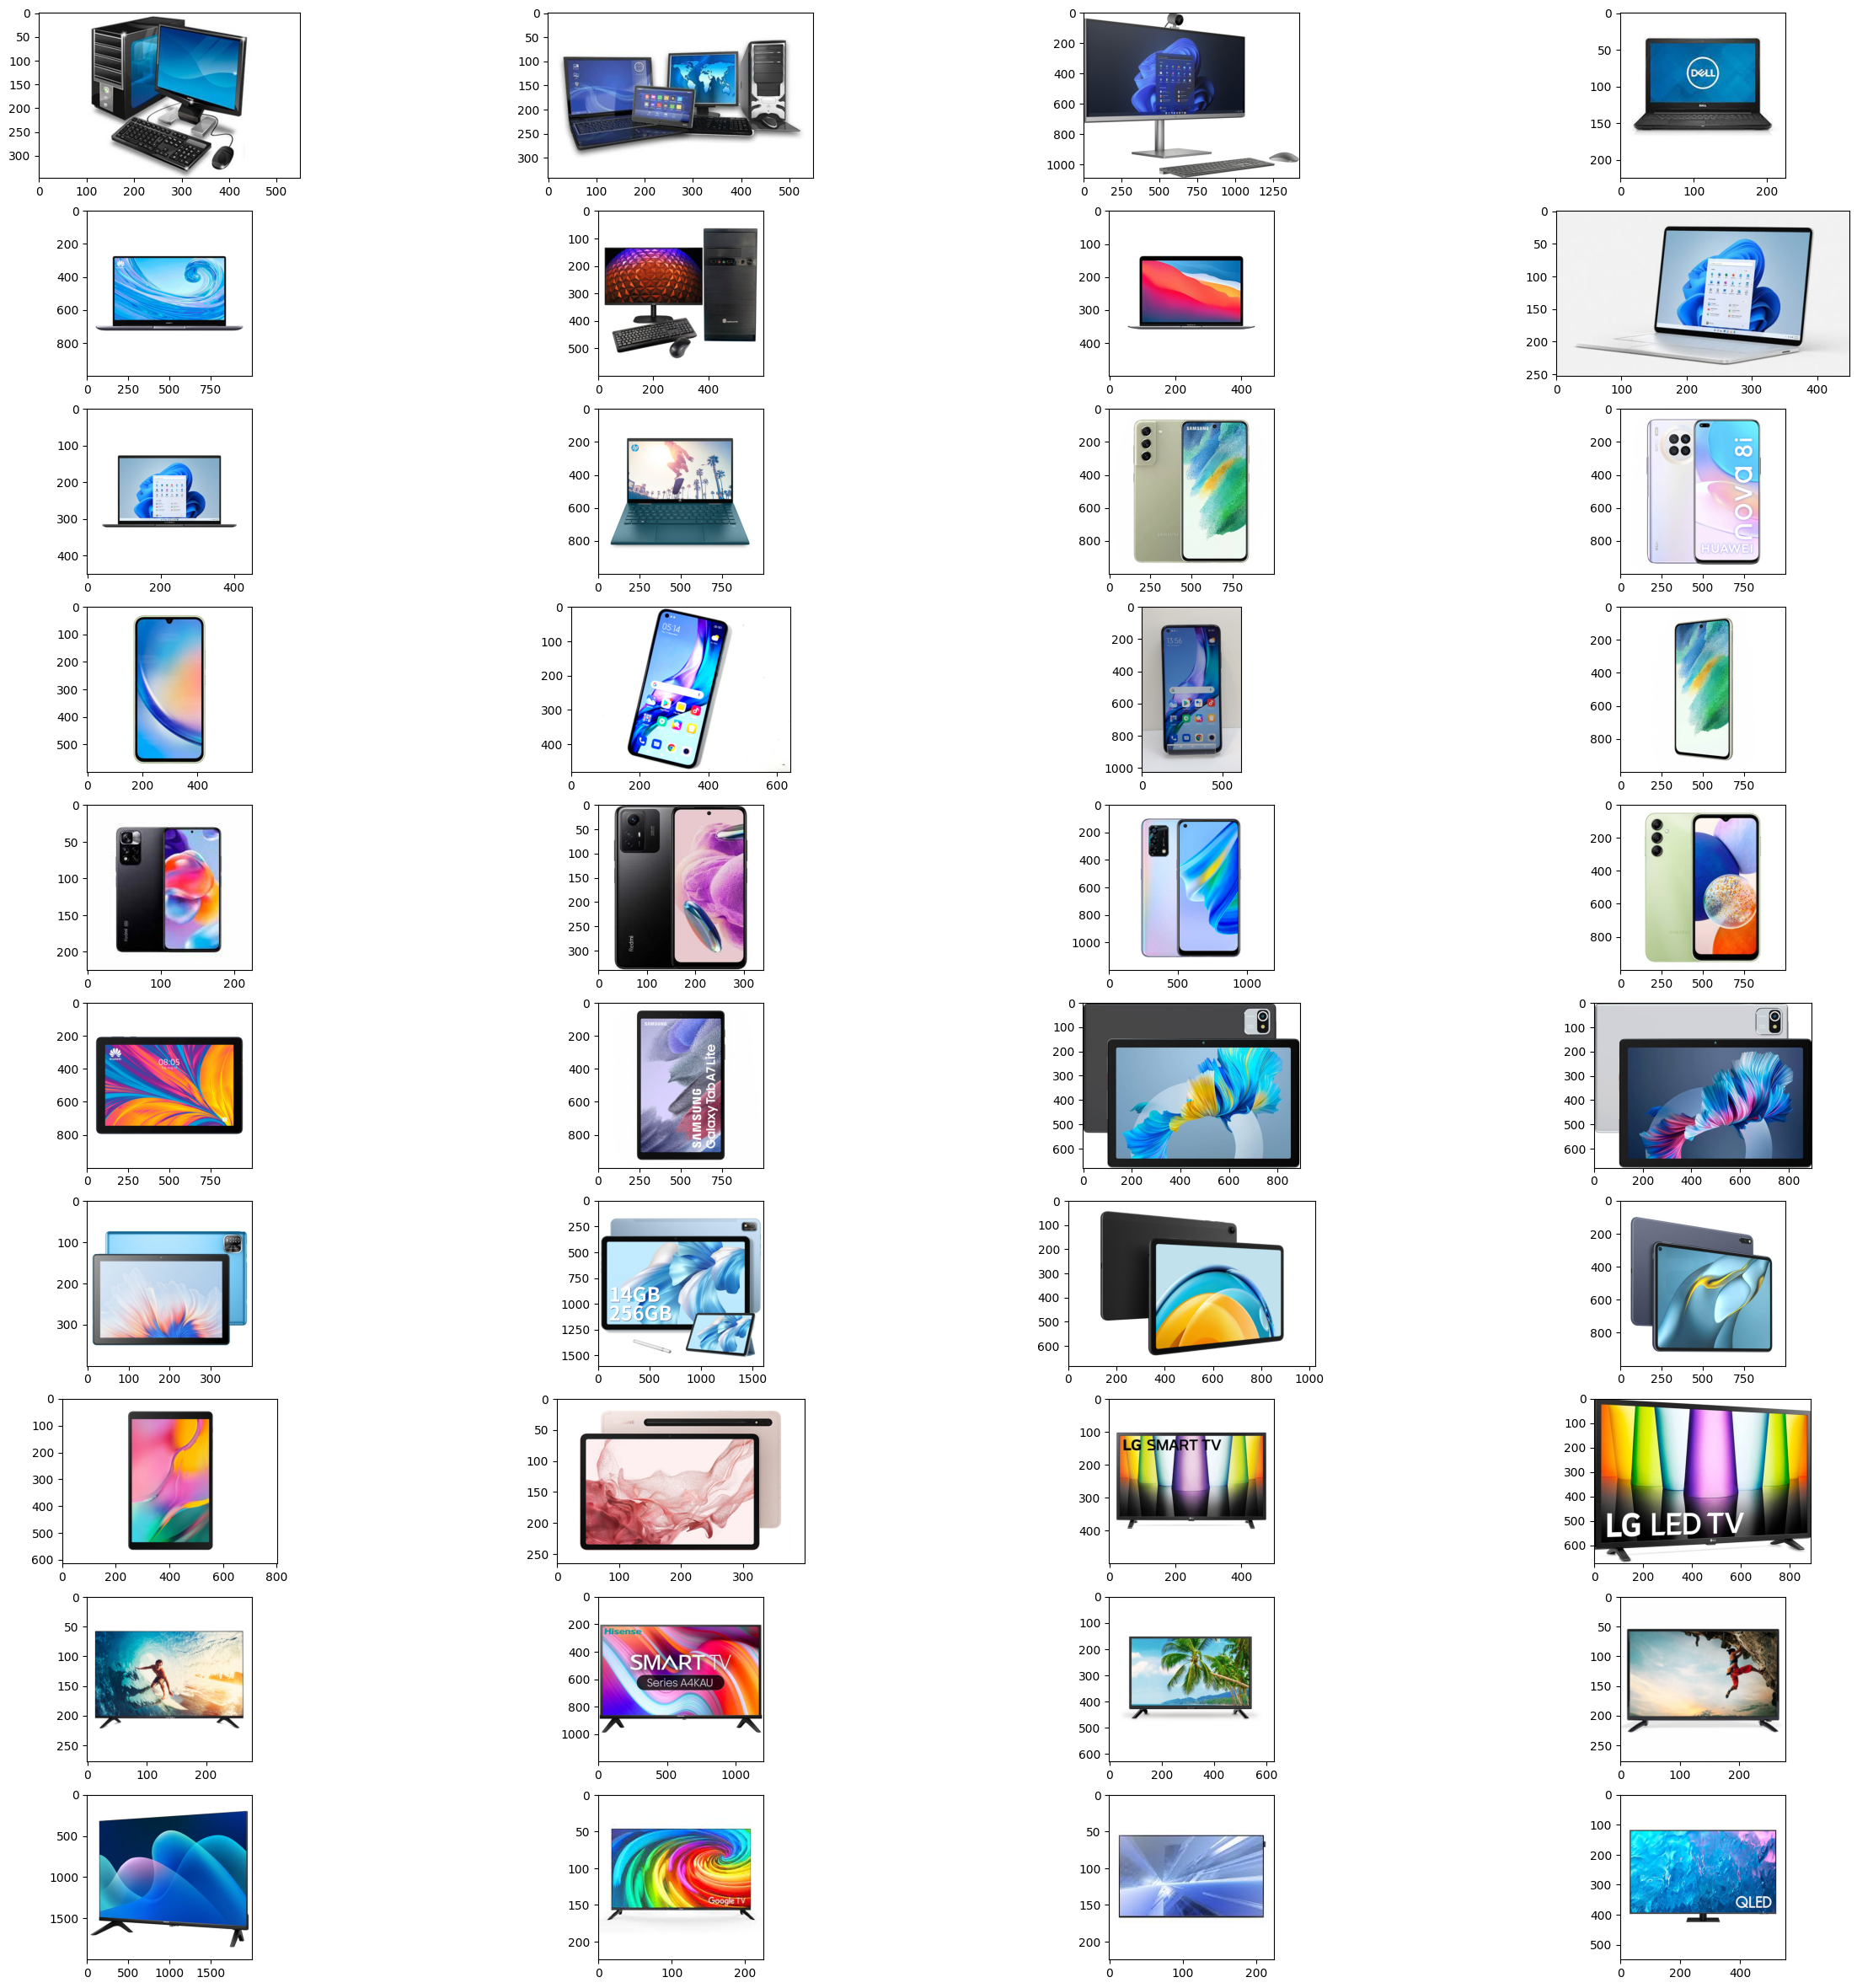

In [3]:
# Visualizando las imagenes de entrenaiento
plt.figure(figsize=(30, 30))
for i in range(1, 41):
    plt.subplot(10, 4, i)
    plt.imshow(imread(train_path+"image"+str(i) + ".jpeg"))

plt.show()

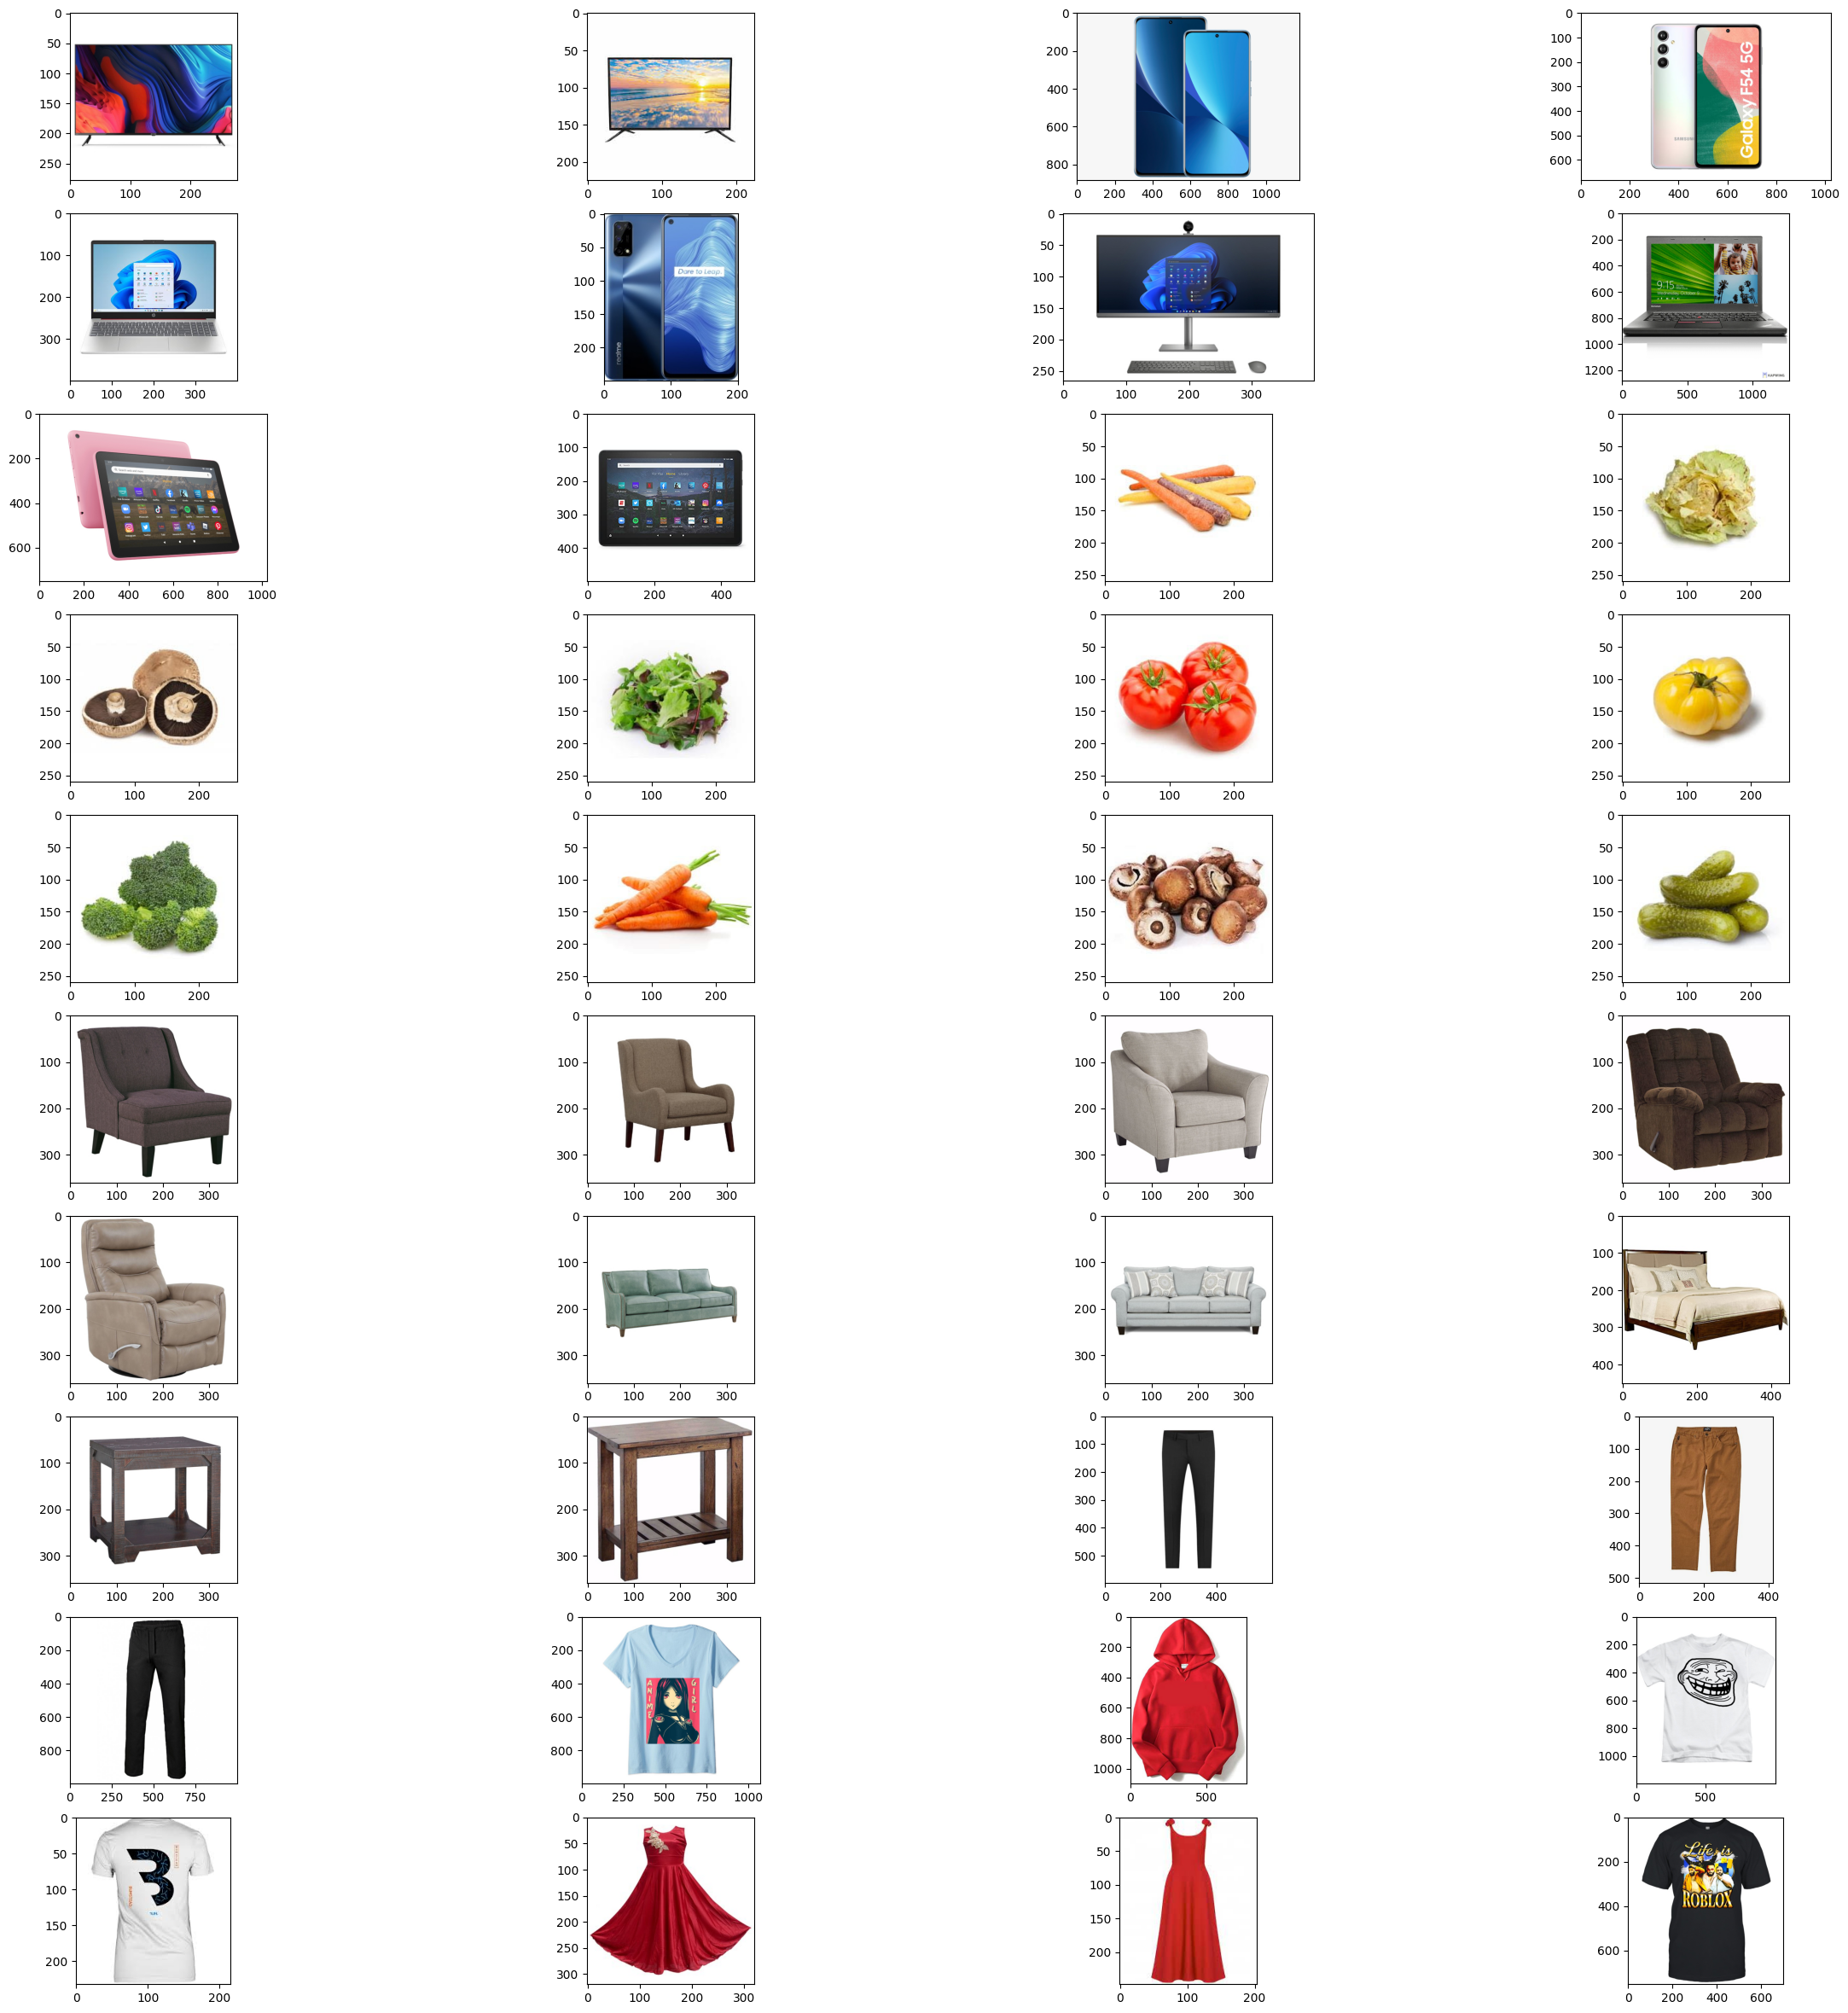

In [4]:
# Visualizando las imagenes de prueba
plt.figure(figsize=(30, 30))
for i in range(1, 41):
    plt.subplot(10, 4, i)
    plt.imshow(imread(test_path+"test_image"+str(i) + ".jpeg"))

plt.show()

In [5]:
df_train = pd.read_csv("./dataset/train.csv")
df_test = pd.read_csv("./dataset/test.csv")

In [6]:
df_train

name  category
0      image1         0
1      image2         0
2      image3         0
3      image4         0
4      image5         0
..        ...       ...
155  image156         3
156  image157         3
157  image158         3
158  image159         3
159  image160         3

[160 rows x 2 columns]

In [7]:
df_test

name  category
0    test_image1         0
1    test_image2         0
2    test_image3         0
3    test_image4         0
4    test_image5         0
5    test_image6         0
6    test_image7         0
7    test_image8         0
8    test_image9         0
9   test_image10         0
10  test_image11         1
11  test_image12         1
12  test_image13         1
13  test_image14         1
14  test_image15         1
15  test_image16         1
16  test_image17         1
17  test_image18         1
18  test_image19         1
19  test_image20         1
20  test_image21         2
21  test_image22         2
22  test_image23         2
23  test_image24         2
24  test_image25         2
25  test_image26         2
26  test_image27         2
27  test_image28         2
28  test_image29         2
29  test_image30         2
30  test_image31         3
31  test_image32         3
32  test_image33         3
33  test_image34         3
34  test_image35         3
35  test_image36         3
36  test_image37         3
37  test_image38         3
38  test_image39         3
39  test_image40         3

In [8]:
labels=[0,1,2,3]
for i in range(len(labels)):
    label = str(i)
    try:
        os.mkdir(train_path + label)
        os.mkdir(test_path + label)
    except OSError:
        pass

In [9]:
# Copiando las imagenes a sus respectivas carpetas
def image_copy(df, path):
    for i in tqdm(range(len(df["name"]))):
        img = df["name"].iloc[i]
        if(df["category"].iloc[i]==0):
            shutil.copy(path+img+".jpeg",path+"0")
        elif(df["category"].iloc[i]==1):
            shutil.copy(path+img+".jpeg",path+"1")
        elif(df["category"].iloc[i]==2):
            shutil.copy(path+img+".jpeg",path+"2")
        elif(df["category"].iloc[i]==3):
            shutil.copy(path+img+".jpeg",path+"3")
    
    print("\nCopiado de imagenes completado para la carpeta: ", path)

image_copy(df_train, train_path)
image_copy(df_test, test_path)

100%|██████████| 160/160 [00:00<00:00, 428.95it/s]



Copiado de imagenes completado para la carpeta:  ./dataset/images/train/


100%|██████████| 40/40 [00:00<00:00, 253.16it/s]


Copiado de imagenes completado para la carpeta:  ./dataset/images/test/


In [10]:
categories = {
    "0": "Tecnologia",
    "1": "Alimentos",
    "2": "Mobiliario",
    "3": "Prendas"
}

In [11]:
df_train["category"] = df_train["category"].astype(str)
df_test["category"] = df_test["category"].astype(str)

In [12]:
# Reemplazando los valores de las categorias por su nombre
df_train["category"] = df_train["category"].replace(categories)
df_test["category"] = df_test["category"].replace(categories)

In [13]:
df_train

name    category
0      image1  Tecnologia
1      image2  Tecnologia
2      image3  Tecnologia
3      image4  Tecnologia
4      image5  Tecnologia
..        ...         ...
155  image156     Prendas
156  image157     Prendas
157  image158     Prendas
158  image159     Prendas
159  image160     Prendas

[160 rows x 2 columns]

In [14]:
df_test

name    category
0    test_image1  Tecnologia
1    test_image2  Tecnologia
2    test_image3  Tecnologia
3    test_image4  Tecnologia
4    test_image5  Tecnologia
5    test_image6  Tecnologia
6    test_image7  Tecnologia
7    test_image8  Tecnologia
8    test_image9  Tecnologia
9   test_image10  Tecnologia
10  test_image11   Alimentos
11  test_image12   Alimentos
12  test_image13   Alimentos
13  test_image14   Alimentos
14  test_image15   Alimentos
15  test_image16   Alimentos
16  test_image17   Alimentos
17  test_image18   Alimentos
18  test_image19   Alimentos
19  test_image20   Alimentos
20  test_image21  Mobiliario
21  test_image22  Mobiliario
22  test_image23  Mobiliario
23  test_image24  Mobiliario
24  test_image25  Mobiliario
25  test_image26  Mobiliario
26  test_image27  Mobiliario
27  test_image28  Mobiliario
28  test_image29  Mobiliario
29  test_image30  Mobiliario
30  test_image31     Prendas
31  test_image32     Prendas
32  test_image33     Prendas
33  test_image34     Prendas
34  test_image35     Prendas
35  test_image36     Prendas
36  test_image37     Prendas
37  test_image38     Prendas
38  test_image39     Prendas
39  test_image40     Prendas

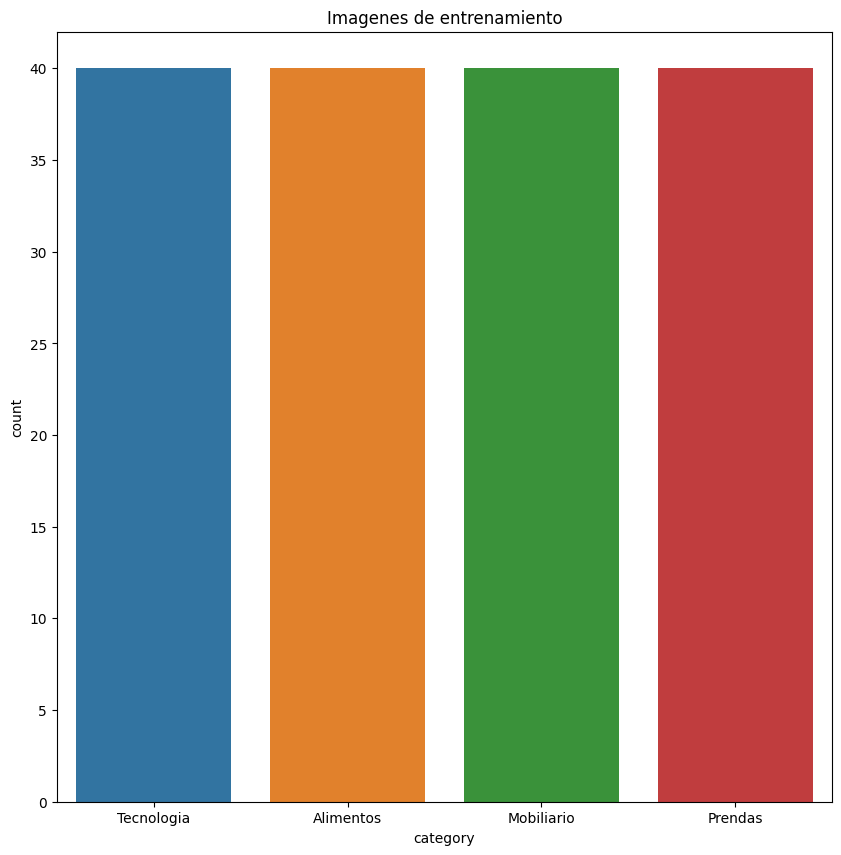

In [15]:
# Visualizando las imagenes de entrenaiento
plt.figure(figsize=(10, 10))
sns.countplot(df_train["category"], x=df_train["category"])
plt.title("Imagenes de entrenamiento")
plt.show()

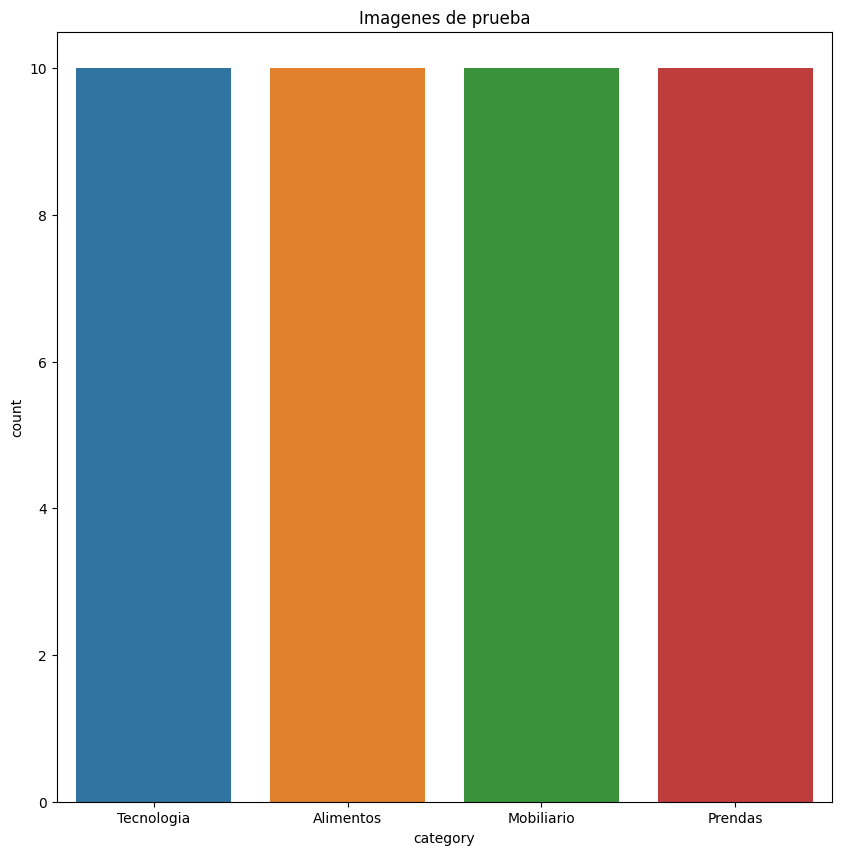

In [16]:
plt.figure(figsize=(10, 10))
sns.countplot(df_test["category"], x=df_test["category"])
plt.title("Imagenes de prueba")
plt.show()

In [17]:
# Promedios de largo y ancho de las imagenes
width = []
height = []
for i in range(1, train_length+1):
    img = imread(train_path+"image"+str(i)+".jpeg")
    width.append(img.shape[0])
    height.append(img.shape[1])

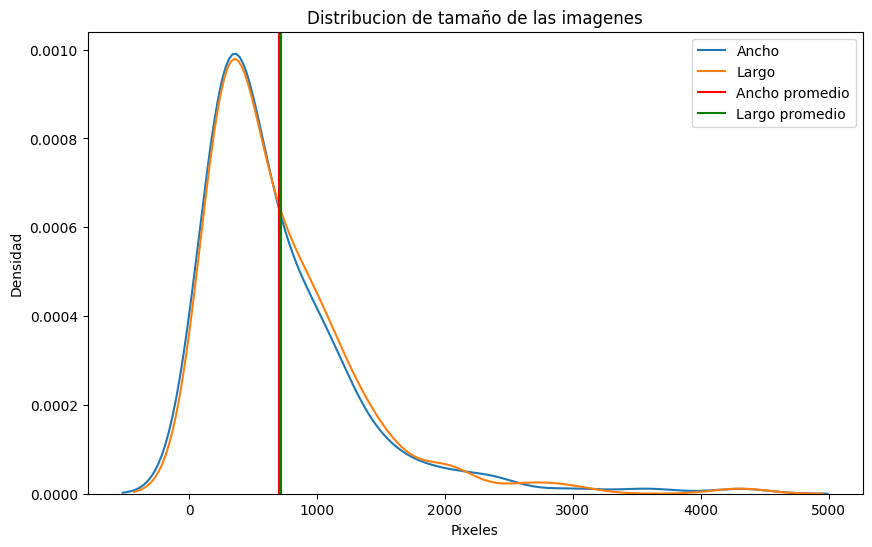

In [18]:
# Visualizando los promedios de largo y ancho de las imagenes
plt.figure(figsize=(10, 6))
plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = True
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = False
sns.kdeplot(width, label='Ancho')
sns.kdeplot(height, label='Largo')
plt.axvline(np.mean(width),color='r',label='Ancho promedio')
plt.axvline(np.mean(height), color='g',label='Largo promedio')
plt.xlabel('Pixeles')
plt.ylabel('Densidad')
plt.title('Distribucion de tamaño de las imagenes')
plt.legend()
plt.show()

In [19]:
# Calculando el promedio de largo y ancho de las imagenes
avg_width = np.mean(width)
avg_height = np.mean(height)

print("Ancho promedio: ", avg_width)
print("Largo promedio: ", avg_height)

Ancho promedio:  700.33125
Largo promedio:  715.3875


In [20]:
imgSize = (int(avg_width), int(avg_height))

# Reescalando las imagenes
train_datagen=ImageDataGenerator(rescale = 1/255,
                                 rotation_range=0.5,
                                 width_shift_range=0.3,
                                 shear_range = 0.2,
                                 height_shift_range=0.3,
                                 horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale = 1/255)

Found 160 images belonging to 4 classes.
Found 40 images belonging to 4 classes.


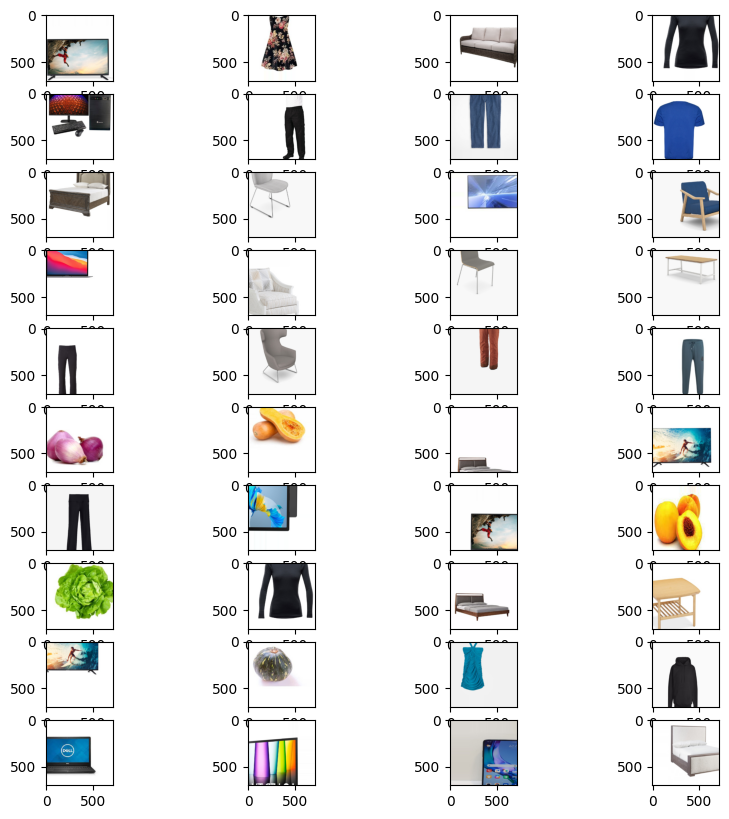

In [21]:
training_set =train_datagen.flow_from_directory(train_path,
                                                target_size=imgSize,
                                                batch_size=50,
                                                class_mode='categorical')
                                                 

test_set = test_datagen.flow_from_directory(test_path,
                                            target_size=imgSize,
                                            batch_size=10,
                                            class_mode='categorical')


# View trainig set images
plt.figure(figsize=(10, 10))
for i in range(1, 41):
    plt.subplot(10, 4, i)
    for X_batch, Y_batch in training_set:
        image = X_batch[0]
        plt.imshow(image)
        break

### Entrenamiento de modelo

In [25]:
# Funciones utiles
def plot_loss(history): # Funcion para graficar la perdida
  plt.plot(history.history['loss'], label='train loss')
  plt.plot(history.history['val_loss'], label='val loss')
  plt.legend()
  plt.show()

def plot_accuracy(history): # Funcion para graficar la precision
  plt.plot(history.history['accuracy'], label='train acc')
  plt.plot(history.history['val_accuracy'], label='val acc')
  plt.legend()
  plt.show()


In [26]:
epochs = 20 # Numero de epocas

#### CNN (1 Capa Convolucional, 1 Capa Pooling)

In [27]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=10000,
    decay_rate=0.0001
    )

model1 = Sequential()
model1.add(Conv2D(32, (3, 3), activation = 'relu', input_shape= (imgSize[0], imgSize[1], 3)))
model1.add(MaxPooling2D((2, 2)))
model1.add(Flatten())
model1.add(Dense(64, activation = 'relu'))
model1.add(Dense(1, activation = 'sigmoid'))
model1.compile(loss='binary_crossentropy',
optimizer=Adam(learning_rate=lr_schedule, beta_1=0.9, beta_2=0.999, epsilon=1e-08),metrics = ['accuracy'])
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 698, 713, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 349, 356, 32)     0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3975808)           0         
                                                                 
 dense_2 (Dense)             (None, 64)                254451776 
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 254,452,737
Trainable params: 254,452,737
Non-trainable params: 0
________________________________________

In [28]:
# Entrenamiento de model1

history1 = model1.fit(training_set,
                                validation_data=test_set,
                                epochs=epochs)

Epoch 1/10
4/4 [==============================] - 134s 42s/step - loss: 307.1732 - accuracy: 0.7188 - val_loss: 179.9738 - val_accuracy: 0.2500
Epoch 2/10
4/4 [==============================] - 138s 32s/step - loss: 126.3574 - accuracy: 0.4375 - val_loss: 171.8106 - val_accuracy: 0.7500
Epoch 3/10
4/4 [==============================] - 131s 28s/step - loss: 156.6230 - accuracy: 0.7500 - val_loss: 65.1456 - val_accuracy: 0.7500
Epoch 4/10
4/4 [==============================] - 130s 28s/step - loss: 59.0083 - accuracy: 0.4375 - val_loss: 28.0925 - val_accuracy: 0.2500
Epoch 5/10
3/4 [=====================>........] - ETA: 22s - loss: 27.3567 - accuracy: 0.5227

KeyboardInterrupt: 

In [ ]:
plot_loss(history1)

In [ ]:
plot_accuracy(history1)

In [ ]:
results1 = model1.evaluate(test_set, steps=len(test_set), verbose=0)
print("Loss: ", results1[0])
print("Accuracy", results1[1])

#### CNN (2 Capas Convolucionales, 2 Capas Pooling)

In [54]:
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation = 'relu', input_shape= (imgSize[0], imgSize[1], 3)))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(64, (3, 3), activation = 'relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Flatten())
model2.add(Dense(64, activation = 'relu'))
model2.add(Dense(1, activation = 'sigmoid'))
model2.compile(loss='binary_crossentropy',
optimizer=Adam(learning_rate=lr_schedule, beta_1=0.9, beta_2=0.999, epsilon=1e-08),metrics = ['accuracy'])
model2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 698, 713, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 349, 356, 32)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 347, 354, 64)      18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 173, 177, 64)     0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 1959744)           0         
                                                                 
 dense_18 (Dense)            (None, 64)               

In [55]:
# Aqui va el entrenamiento de model2

history2 = model2.fit(training_set,
                                validation_data=test_set,
                                epochs=epochs)

Epoch 1/10
32/32 [==============================] - 133s 4s/step - loss: -91289.3359 - accuracy: 0.2500 - val_loss: -338535.5000 - val_accuracy: 0.2500
Epoch 2/10
27/32 [========================>.....] - ETA: 16s - loss: -1414675.2500 - accuracy: 0.2370

KeyboardInterrupt: 

In [ ]:
plot_loss(history2)

In [ ]:
plot_accuracy(history2)

In [ ]:
results2 = model2.evaluate(test_set, steps=len(test_set), verbose=0)
print("Loss: ", results2[0])
print("Accuracy", results2[1])

#### CNN (3 Capas Convolucionales, 3 Capas Pooling)

In [ ]:
model3 = Sequential()
model3.add(Conv2D(32, (3, 3), activation = 'relu', input_shape= (imgSize[0], imgSize[1], 3)))
model3.add(MaxPooling2D((2, 2)))
model3.add(Conv2D(64, (3, 3), activation = 'relu'))
model3.add(MaxPooling2D((2, 2)))
model3.add(Conv2D(128, (3, 3), activation = 'relu'))
model3.add(MaxPooling2D((2, 2)))
model3.add(Flatten())
model3.add(Dense(64, activation = 'relu'))
model3.add(Dense(1, activation = 'sigmoid'))
model3.compile(loss='binary_crossentropy',
optimizer=Adam(learning_rate=lr_schedule, beta_1=0.9, beta_2=0.999, epsilon=1e-08),metrics = ['accuracy'])
model3.summary()

In [ ]:
# Aqui va el entrenamiento de model3

history3 = model3.fit(training_set,
                                validation_data=test_set,
                                epochs=epochs)

In [ ]:
plot_loss(history3) 

In [ ]:
plot_accuracy(history3)

In [ ]:
results3 = model3.evaluate(test_set, steps=len(test_set), verbose=0)
print("Loss: ", results3[0])
print("Accuracy", results3[1])

#### CNN (Transfer Learning)

In [ ]:
# Usar resnet50 para el modelo 4
# Cargando los pesos de resnet50
resnet = ResNet50(input_shape= (imgSize[0], imgSize[1], 3), weights='imagenet', include_top=False)
for i in resnet.layers:
    i.trainable=False
x = Flatten()(resnet.output)
prediction = Dense(1, activation='sigmoid')(x)
model4 = Model(inputs=resnet.input, outputs=prediction)
model4.summary()

In [ ]:
model4.compile(loss='binary_crossentropy',
                     optimizer='adam',
                     metrics=['accuracy'])

In [ ]:
# Aqui va el entrenamiento de model4
history4 = model4.fit(training_set,                
                    validation_data=test_set,
                    epochs=epochs)

In [ ]:
plot_loss(history4)


In [ ]:
plot_accuracy(history4)

In [ ]:
results4 = model4.evaluate(test_set, steps=len(test_set), verbose=0)

### Resultados Finales

In [ ]:
modelos = ['CNN 1 capa', 'CNN 2 capas', 'CNN 3 capas', 'ResNet50']
model_acc = [results1[1], results2[1], results3[1], results4[1]]

data = [modelos, model_acc]
columns = ['Modelo', 'Precision']

summary = pd.DataFrame(np.column_stack(data), columns=columns)

In [ ]:
summary